# Analysis and Findings
***
## Overview
The main_data_exploration.ipynb notebook aquired data sources and cleaned them up for analysis. This notebook takes the cleaned dataframes and uses them to answer the main hypthesis question: do countries with higher unemployment rate have higher suicide rates? After loading in the data, two functions, one for plotting histograms and the other for scatterplots, are defined. Each function is called on the suicide and unemployment rates data to produce graphics that explain the data. A linear regression is also provided which tested if the to quantities are correlated.
### Dependecies

In [10]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

### Load Data

In [11]:
# Load df from main_data_exploration.ipynb
sui_vs_uem = pd.read_csv('Clean_Data/suicide_vs_unemployment_clean')

# Create two series, one for suicide rates and one for unemployment rate
sui_u = sui_vs_uem['suicide rate']
uem = sui_vs_uem['unemployment rate']

# Load df from main_data_exploration.ipynb
sui_vs_gdp = pd.read_csv('Clean_Data/suicide_vs_gdp_clean')

# Create two series, one for suicide rates and one for gdp per capita
sui_g = sui_vs_gdp['suicide rate']
gdp = sui_vs_gdp['gdp per capita']

##  Build Functions to Analyse Data

In [12]:
# Build function that prints histogram for givin series:
# series is the series used to create the histogram, xlim is optional maximum x value displayed, 
# bin_count is optional number of bins (default is 100), mean is boolean to display mean (default is True)
def hist(series, xlim=-1, bin_count=100, mean=True):

    # If statement to handle default xlim value (-1 is default argument if no xlim is given)
    if xlim == -1:
        
        # Set xlim to the maximun x value cast as an int
        xlim = int(round(max(series),0))

    # Compute bin width as lim/count *does not need to be int   
    bin_width = xlim/bin_count
    
    # Define list for bins
    bins = [bin_width*x for x in range(bin_count)]

    # Plot histogram and store the counts as variable
    counts = plt.hist(series, bins=bins)[0]

    # Define y limit as counts rounded up to nearest 10
    ylim = round(max(counts), -1) + 10
    
    # Set plot limits
    plt.xlim(0, xlim)
    plt.ylim(0, ylim)
    
    # Axis labels
    plt.xlabel(series.name)
    plt.ylabel(f'Number of data in each bin')
    
    # If statement for mean: only print if True
    if mean:
        
        # Compute mean
        mean_value = series.mean()
        median_value = series.median()
        
        # Plot vertical line at mean
        plt.vlines(mean_value, 0, ylim, colors='red')
        
        # Print the mean value on top of the plot
        plt.annotate(f'Mean={"{:,.2f}".format(mean_value)}, Median={"{:,.2f}".format(median_value)}', (xlim/2, ylim/2), c='red')

    # Print title of histogram
    plt.title(f'Histogram of {series.name} data')
    
    # Save image
    plt.savefig(f'Images/{str(series.name).split()[0]}_hist.png', format='png')
    plt.show()

In [13]:
# Define a function to perform and plot linear regression: xsereis and ysereis are the 2 series in the regression
def linreg(xseries, yseries, ylim=60):
    
    # Save (unpack tuple) linear regression coefficients and statistics
    slope, intercept, rvalue, pvalue, error = st.linregress(xseries, yseries)

    # Compute y prediction (linear regression) values
    y_prediction = slope * xseries + intercept

    # Save strings for r squared and y hat charectors
    r_squared_str = "{}\u00b2".format('r')
    y_hat_str = '\u0177'
    
    # Save a string that shows eqaution on line and regression statistics
    y_prediction_str = f'{y_hat_str}={round(slope,4)}*x+{round(intercept,2)}, pvalue={"{:.2e}".format(pvalue)}, {r_squared_str}={round(rvalue*rvalue,2)}'
    
    # Plot scatter plot of x and y series
    plt.scatter(xseries, yseries, s=1)
    
    # Title, axes limits and axes names
    plt.title(f'Conutry {yseries.name} vs {xseries.name}')
    plt.xlim(0, max(xseries))
    plt.ylim(0,ylim)
    plt.xlabel(xseries.name)
    plt.ylabel(yseries.name)
    
    # Plot regression line and display text of line equation and statistics
    plt.plot(xseries, y_prediction, c='red')
    plt.annotate(y_prediction_str, (max(xseries)/20, ylim*11/12), c='red')
    
    # Save image
    plt.savefig(f'Images/{str(yseries.name).split()[0]}_vs_{str(xseries.name).split()[0]}_scatter.png', format='png')
    plt.show()

## Country Suicide and Unemployment Rates Analysis
As stated the main hypothesis questions we are answering is: do countries with higher unemployment rate have higher suicide rates? This section first looks at how the data sets are distributed and then looks are their correlation.
### Country Suicide and Unemployment Rate Distributions

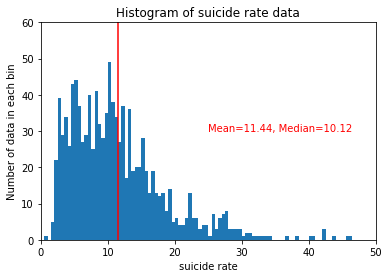

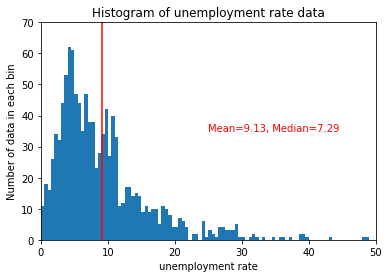

In [14]:
# Plot histograms for suicide and uemployment rates
hist(sui_u, xlim=50)
hist(uem)

It is worth noting that both distributions are scewed right - there is a tail of values much higher than the median that pulls the mean up higher. While some of these tial values could be consider outliers, it is important to keep all the data and look for outliers on in the scatter plot between both quanities.  

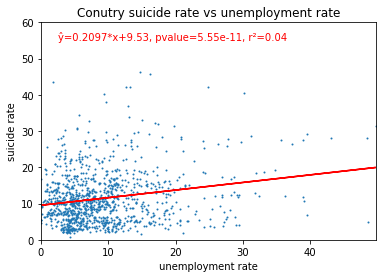

In [15]:
# PLot linear regression for gdp and suicide rates
linreg(uem, sui_u)

The linear regression test resulted in a p-value of 5.55x10^-11 which is much less than alpha = 0.05 meaning the null hypothesis - the slope of country suicide rates vs country unemployment rates is 0 - can be rejected. Specifically this is saying the slope value of 0.21 is significant and discribes the correlation between the two rates. The slope is greater than 1 meaning that as unemployment rate increases, suicide rate generally increases as well. The small r squared value of 0.04 indicates that the data has a high variance and, paricularly, for a given small window of unemployment rates there is a large range of suicide rates associated with such window. The implication is that while the data has positive correlation, the linear eqution is not a great predictor.

## Suicide Rate and Country GDP

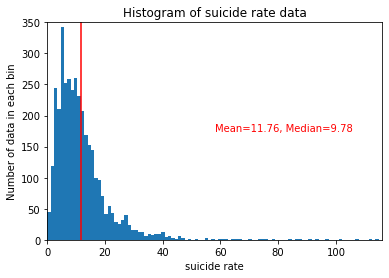

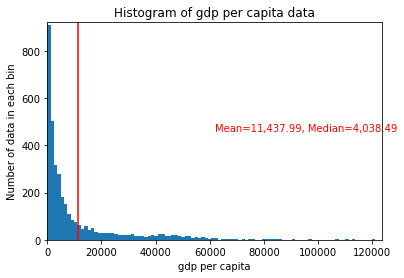

In [16]:
# Plot histograms for suicide rates and gdps
hist(sui_g)
hist(gdp)

The distribution for hte gdp data is also scewed to the right. 

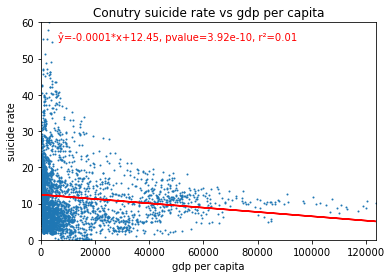

In [17]:
# PLot linear regression for gdp and suicide rates
linreg(gdp, sui_g)

This linear regression resulted in a pvalue of 3.92x10^-10 which is much less than alpha = 0.05. Therefore we reject the null hypothesis that suicide rate and gdp are not correlated. The slope is -0.0001 which is less than 1 meaning that as gdp increases, suicide rates tend to decrease. The r^2 value is again very close to 0. In this situation, there is probably a better typpe of correlation (i.e. power law) that discribes the data better. Again, the linear equation probably is not the best predictor for the data due to the low r^2 vaule. 

The boundry of the data looks to follow a reciprical relation. So below we look at plotting the suicide values along the boundry vs recipriacl gdp per capita and performing a linear regresion.

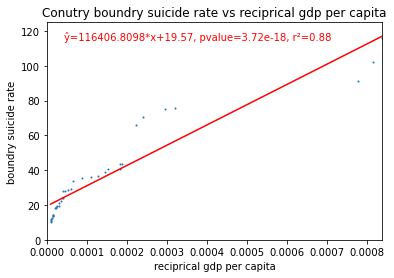

In [18]:
gdp_ = 0
gdp_rec_list = []
sui_max_list = []

while gdp_ < max(sui_vs_gdp['gdp per capita']):
    sui_max_ = max(sui_vs_gdp.loc[sui_vs_gdp['gdp per capita'] > gdp_, 'suicide rate'])
    gdp_ = float(sui_vs_gdp.loc[sui_vs_gdp['suicide rate'] == sui_max_, 'gdp per capita'])
    sui_max_list.append(sui_max_)
    gdp_rec_list.append(1/gdp_)

bound = pd.DataFrame({'reciprical gdp per capita': gdp_rec_list, 'boundry suicide rate': sui_max_list})
linreg(bound['reciprical gdp per capita'], bound['boundry suicide rate'], ylim=125)

Here the pvalue is very small compared to alpha = 0.05. Therefore, the boundry of suicide rate vs gdp per capita has the form y=cons./(gdp per capita). One way to inturpirt this is that for small values of per capita gdp and suicide rate there are other factors that affect suicide rate. However as suicide rate and gdp approach the curve described above, per capita gdp becomes a dominant factor in determining suicide rate. 